In [1]:
import numpy as np
import nsfg
import thinkstats2
import thinkplot
import pandas as pd
import analytic

In [2]:
resp = pd.DataFrame(data=nsfg.ReadFemResp())

In [3]:
#  Question 1-----
school = resp[resp.hieduc <= 10]
university = resp[resp.hieduc > 10]

In [4]:
print (' 1: mother was younger than 18 \n 2: mother was aged 18-19+ \n 3: mother was aged 20-24,' +  
       '\n 4: mother was aged 25-29, \n 5: mother was 30 or older, \n 95: no mother or mother figure,' + 
       '\n 96: mother figure had no children')
print ('var school is the mothers who did not get a college degree \n' +
      'var university is the mothers who have at least 1 college degree')

 1: mother was younger than 18 
 2: mother was aged 18-19+ 
 3: mother was aged 20-24,
 4: mother was aged 25-29, 
 5: mother was 30 or older, 
 95: no mother or mother figure,
 96: mother figure had no children
var school is the mothers who did not get a college degree 
var university is the mothers who have at least 1 college degree


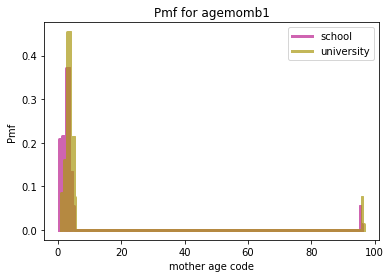

In [5]:
# Question 2-----
pmf_school = thinkstats2.Pmf(school.agemomb1)
pmf_university = thinkstats2.Pmf(university.agemomb1)

thinkplot.PrePlot(2)
thinkplot.Pmf(pmf_school, align='right', width=0.5, label='school', color='#BB2391')
thinkplot.Pmf(pmf_university, align='left', width=0.5, label='university', color='#AA9912')
thinkplot.Config(title='Pmf for agemomb1', xlabel='mother age code', ylabel='Pmf')

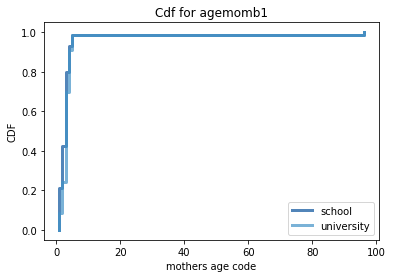

In [6]:
cdf_school = thinkstats2.Cdf(school.agemomb1, label='school')
cdf_university = thinkstats2.Cdf(university.agemomb1, label='university')
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_school, cdf_university])
thinkplot.Show(title='Cdf for agemomb1', xlabel='mothers age code', ylabel='CDF')

No handles with labels found to put in legend.


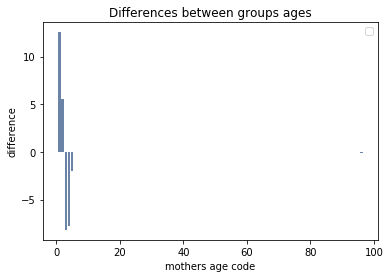

In [7]:
# Question 3-----
keys= pmf_school
diffs=[]
for key in pmf_school:
    p1= pmf_school.Prob(key)
    p2= pmf_university.Prob(key)
    dif= 100*(p1-p2)
    diffs.append(dif)
thinkplot.Bar(keys, diffs)
thinkplot.Config(title='Differences between groups ages', xlabel='mothers age code', ylabel='difference')

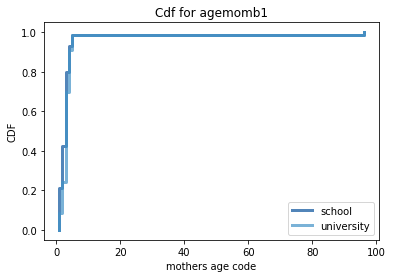

In [20]:
# Question 4----
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_school, cdf_university])
thinkplot.Show(title='Cdf for agemomb1', xlabel='mothers age code', ylabel='CDF')

In [46]:
scless18  = cdf_school.Prob(1)
uniless18 = cdf_university.Prob(1)
scperc18  = 1-scless18
uniperc18 = 1-uniless18
print ('The probability of mothers who are younger than 18 in school var is: %' + str(int(scless18*100)))
print ('The probability of mothers who are younger than 18 in university var is: %' + str(int(uniless18*100)))
print ('The percentage of mothers who are 18 or older in school var is: %' + str(int(scperc18*100)))
print ('The percentage of mothers who are 18 or older in university var is: %' + str(int(uniperc18*100)))

The probability of mothers who are younger than 18 in school var is: %20
The probability of mothers who are younger than 18 in university var is: %8
The percentage of mothers who are 18 or older in school var is: %79
The percentage of mothers who are 18 or older in university var is: %91


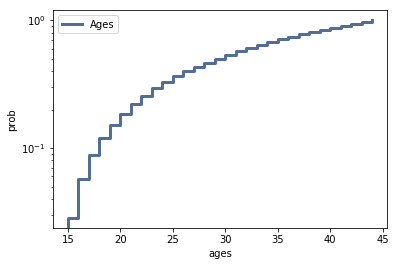

In [47]:
# Question 5----
# using agescrn and basewgt columns...

ages = resp.agescrn
cdf = thinkstats2.Cdf(ages, label='Ages')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='ages', ylabel='prob', yscale='log')
# Used exponential because it is less likely to have baby for an older woman thus the prob. goes down with age

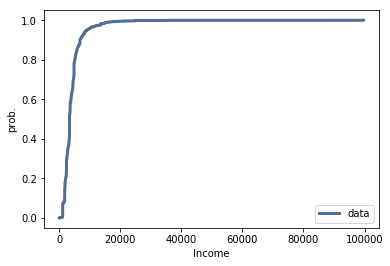

In [48]:
income = resp.basewgt
mean, var = thinkstats2.TrimmedMeanVar(income, p=0.01)

incomecdf= thinkstats2.Cdf(income, label='data')
thinkplot.Cdf(incomecdf)
thinkplot.Show(xlabel='Income', ylabel='prob.')
# used normal distribution for incomes because the income is more fit for the normal dist.